# Imports

## Data Management

In [1]:
import datetime
import numpy as np
import pandas as pd

## Analysis and Cleaning

In [2]:
import string
import re

from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, \
                                        strip_multiple_whitespaces, strip_numeric, \
                                        remove_stopwords, strip_short 
from gensim.models import Word2Vec

## Learning

In [3]:
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Visualization

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis & Cleanup

In [5]:
fake = pd.read_csv('datasets/Fake.csv')
true = pd.read_csv('datasets/True.csv')
print('False Sample')
display(fake.sample(10))
print('\n\n\n\n')
print('True Sample')
display(true.sample(10))

False Sample


,title,text,subject,date
7062,Ted Cruz Arrives In The Bronx Only To Put Dow...,You ve honestly got to be a special kind of st...,News,"April 6, 2016"
15006,Who do you think won the CNBC GOP Presidential...,Please help us determine who real grassroots c...,politics,"Oct 29, 2015"
19697,BREAKING EMAIL LEAK: “Bernie needs to be groun...,Hey Bernie how s that whole Queen of Wall Stre...,left-news,"Nov 1, 2016"
12088,MTV Releases Racist ‘Hey Fellow White Guy’s Vi...,,politics,"Dec 21, 2016"
2087,Trump’s SCOTUS Nominee Has DISTURBING History...,We all knew that Donald Trump would be a night...,News,"March 20, 2017"
14379,WAKE UP AMERICA! SOMALI CANDIDATES IN MINNESOT...,"While our eyes are on the invasion of Europe, ...",politics,"Mar 2, 2016"
8905,Ted Cruz Reveals Paranoid Fantasy Involving O...,Republican presidential hopeful Ted Cruz stunn...,News,"January 7, 2016"
14050,"BEYONCE DOUBLES DOWN…Debuts #LEMONADE, Another...",Most of the world will be obsessed with Beyonc...,politics,"Apr 24, 2016"
2603,"Trump Just Met With Airline Execs, RUINS Meet...",Donald Trump has turned yet another meeting in...,News,"February 9, 2017"
15462,SHAKEDOWN AL SHARPTON MEETS WITH GM TO PRESSUR...,"I m a mom who grew up in Romeo, MI., the same ...",politics,"Jul 15, 2015"







True Sample


,title,text,subject,date
5634,Trump says Pence will lead voter fraud panel,"WEST PALM BEACH, Fla. (Reuters) - President Do...",politicsNews,"February 5, 2017"
12132,Thai tour guide arrested for inappropriate beh...,BANGKOK (Reuters) - Thai authorities have arre...,worldnews,"December 16, 2017"
7223,"Schumer, McConnell elected top leaders in Senate",WASHINGTON (Reuters) - Democratic U.S. senator...,politicsNews,"November 16, 2016"
10816,"Foreclosure crisis snarls Clinton, Sanders' ef...",(Reuters) - Democratic presidential hopefuls B...,politicsNews,"February 14, 2016"
20199,"As North Korea girds for latest sanctions, eco...","DANDONG, China (Reuters) - The United Nations ...",worldnews,"September 13, 2017"
247,Aide tries to refocus tax debate after Trump's...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 8, 2017"
8880,House No. 2 Republican says still questions Cl...,(Reuters) - U.S. House Majority Leader Kevin M...,politicsNews,"July 5, 2016"
19677,Rescued migrants say lucky to dodge Libyan coa...,ABOARD AQUARIUS RESCUE SHIP (Reuters) - Migran...,worldnews,"September 19, 2017"
8555,Trump ally Christie calls criticisms of slain ...,"WASHINGTON (Reuters) - Chris Christie, a close...",politicsNews,"August 2, 2016"
3883,Trump review of Wall Street rules to be done i...,NEW YORK/WASHINGTON (Reuters) - The U.S. gover...,politicsNews,"May 8, 2017"


## Getting rid of unwanted strings

In [6]:
cleansed_data = []
for data in true.text:
    if "@realDonaldTrump : - " in data:
        cleansed_data.append(data.split("@realDonaldTrump : - ")[1])
    elif "(Reuters) -" in data:
        cleansed_data.append(data.split("(Reuters) - ")[1])
    else:
        cleansed_data.append(data)

true["text"] = cleansed_data
display(true.head(10))

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so-...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! b...",politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017"


## Joining title and text

In [7]:
fake['Sentences'] = fake['title'] + ' ' + fake['text']
true['Sentences'] = true['title'] + ' ' + true['text']

In [8]:
true.head()

,title,text,subject,date,Sentences
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...


## Adding Labels, concatenating and mixing

In [9]:
fake['Label'] = 0
true['Label'] = 1

final_data = pd.concat([fake, true])

final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

## Droping uneeded columns

In [10]:
final_data = final_data.drop(['title', 'text', 'subject', 'date'], axis = 1)
display(final_data.head(10))

,Sentences,Label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,0
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,0
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,0
8,North Korea shows no sign it is serious about ...,1
9,Trump signals willingness to raise U.S. minimu...,1


## Processing Sentences

### Function

In [11]:
def remove_URL(s):
    regex = re.compile(r'https?://\S+|www\.\S+|bit\.ly\S+')
    return regex.sub(r'',s)

### List of functions

In [12]:
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, remove_URL, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]

### Useful info

In [13]:
words_broken_up = [preprocess_string(sentence, CUSTOM_FILTERS) for sentence in final_data.Sentences]

In [14]:
processed_data = [word for word in words_broken_up if len(word) > 0]

In [15]:
processed_labels = [label for num, label in enumerate(final_data.Label) if len(words_broken_up[num]) > 0]

# Word2Vec

In [16]:
model = Word2Vec(processed_data, min_count=1)
display(model.wv.most_similar("country"))

[('nation', 0.8211482763290405),
 ('america', 0.6449085474014282),
 ('countries', 0.6018150448799133),
 ('europe', 0.5721968412399292),
 ('dealmaker”', 0.5451688766479492),
 ('world', 0.524400532245636),
 ('especially', 0.514208197593689),
 ('means', 0.4974181056022644),
 ('path', 0.48721593618392944),
 ('fear', 0.4780063033103943)]

## Sentence Vectors

In [17]:
def return_vector(model_made, x):
    try:
        return model_made[x]
    except:
        return np.zeros(100)
    
    
def sentence_vector(model_made, sentence):
    word_vectors = list(map(lambda x: return_vector(model_made, x), sentence))
    return np.average(word_vectors, axis=0).tolist()

In [18]:
X = np.array([sentence_vector(model, data) for data in processed_data])

C:\Users\jarc1\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# Clustering

In [19]:
kmeans = cluster.KMeans(n_clusters=2, verbose=1)
clustered = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 797034.5814754908
Iteration 1, inertia 469822.3581141416
Iteration 2, inertia 454721.90205345955
Iteration 3, inertia 449163.4764854106
Iteration 4, inertia 446957.490341186
Iteration 5, inertia 445725.57276875945
Iteration 6, inertia 444988.7387002231
Iteration 7, inertia 444631.13049879455
Iteration 8, inertia 444471.74890456063
Iteration 9, inertia 444414.9960367619
Iteration 10, inertia 444396.94775127666
Iteration 11, inertia 444389.32258432487
Iteration 12, inertia 444386.69616800034
Iteration 13, inertia 444385.9518836059
Converged at iteration 13: center shift 1.1116875513575477e-05 within tolerance 1.1825059075582397e-05
Initialization complete
Iteration 0, inertia 711966.5527862577
Iteration 1, inertia 490386.9343802891
Iteration 2, inertia 482759.41313339345
Iteration 3, inertia 470492.40758340835
Iteration 4, inertia 455541.67887200473
Iteration 5, inertia 447028.1790759409
Iteration 6, inertia 444889.9942452808
Iteration 7, iner

In [20]:
testing_df = pd.DataFrame({'Sentence': processed_data, 'Labels': processed_labels, 'Prediction': clustered})
display(testing_df.head(20))

,Sentence,Labels,Prediction
0,"[ben, stein, calls, circuit, court, committed,...",0,0
1,"[trump, drops, steve, bannon, national, securi...",1,1
2,"[puerto, rico, expects, lift, jones, act, ship...",1,1
3,"[oops, trump, accidentally, confirmed, leaked,...",0,0
4,"[donald, trump, heads, scotland, reopen, golf,...",1,0
5,"[paul, ryan, responds, dem’s, sit, gun, contro...",0,0
6,"[awesome, diamond, silk, rip, press, “we, don’...",0,0
7,"[stand, cheer, ukip, party, leader, slams, ger...",0,1
8,"[north, korea, shows, sign, talking, official,...",1,1
9,"[trump, signals, willingness, raise, minimum, ...",1,0


## Validating

In [21]:
testing_df['accuracy'] = np.logical_not(np.logical_xor(testing_df['Labels'], testing_df['Prediction']))
assertion = np.sum(testing_df.accuracy)/np.sum(len(testing_df.accuracy))*100

print('Data classificated correctly: ', assertion, '%')

Data classificated correctly:  87.39557575352536 %


# Visualization

## Prinicpal Component Analysis (PCA)

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']

## T-Distributed Stochastic Neighbor Embedding (TSNE)

In [23]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

TSNE_df = pd.DataFrame(tsne_result)
TSNE_df['cluster'] = clustered
TSNE_df.columns = ['x1','x2','cluster']

### Plots

Text(0.5, 1.0, 'Visualized on PCA')

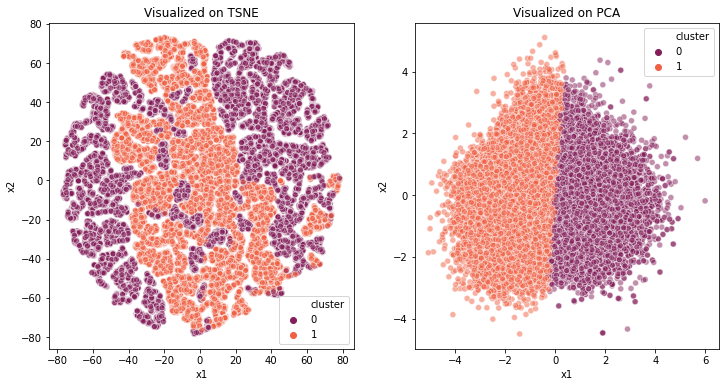

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1], palette=sns.color_palette('rocket', 2))
sns.scatterplot(data=TSNE_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0], palette=sns.color_palette('rocket', 2))
ax[0].set_title('Visualized on TSNE')
ax[1].set_title('Visualized on PCA')

# Custom new tests
Testing with fake news generated from https://www.thefakenewsgenerator.com/

### Onion

In [25]:
onion_data = "Flint Residents Learn To Harness Superpowers, But Trump Gets Away Again They developed superpowers after years of drinking from a lead-poisoned water supply. But just having incredible abilities doesn't make them superheroes. Not yet. Donald Trump faced off against the superpowered civilians but he got away before they could catch him"

# Preprocess article
onion_data = preprocess_string(onion_data, CUSTOM_FILTERS)

# Get sentence vector
onion_data = sentence_vector(model, onion_data)

# Get prediction
kmeans.predict(np.array([onion_data]))

C:\Users\jarc1\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([0])

### News from BBC

In [26]:
bbc_data = "Nasa Mars 2020 Mission's MiMi Aung on women in space Next year, Nasa will send a mission to Mars. The woman in charge of making the helicopter that will be sent there – which is set to become the first aircraft to fly on another planet – is MiMi Aung. At 16, MiMi travelled alone from Myanmar to the US for access to education. She is now one of the lead engineers at Nasa. We find out what it's like being a woman in space exploration, and why her mum is her biggest inspiration."

# Preprocess article
bbc_data = preprocess_string(bbc_data, CUSTOM_FILTERS)

# Get sentence vector
bbc_data = sentence_vector(model, bbc_data)

# Get prediction
kmeans.predict(np.array([bbc_data]))

C:\Users\jarc1\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([1])